#  Medical Imaging
##  Practical session 4
### Image Processing: Image Segmentation
### 24th of November 2025
***
**Sebastian Amador Sanchez (sebastian.amador.sanchez@vub.be), Anass Hamdi (anass.hamdi@vub.be), Jef Vandemeulebroucke\
Department of Electronics and Informatics (ETRO)\
Vrije Universitet Brussel, Pleinlaan 2, B-1050 Brussels, Belgium**

<font color=blue>Insert students names and IDs here</font>

Noah Cokelaere 02200833
Arend Verdonck xxxxxxxx


## Instructions
The jupyter notebook should be submitted as the report individually or by teams of two using the assignment functionality of Ufora.

Please complete this notebook and upload one of the following before the deadline **7th of December, 2025, at 23:59**:
- the notebook in *.ipynb* format
- the executed notebook in *.html* format (File --> Download As --> HTML)

The report should contain python code and plotted figures. For this practical session, **we do not** require a separate written report in *.pdf* format.

## Introduction
The goal of this exercise session is to obtain insight in the image segmentation operations and their evaluation metrics commonly applied in medical image processing. For more information on the following concepts see the lecture recordings, course slides and the related study material.

### BraTS dataset
You will be working with images from the [*Brain Tumor Segmentation (BRATS) Challenge*](http://www.braintumorsegmentation.org), which contains scans of multiple glioma cases. Gliomas are a type of brain tumor originating in the glial cells surrounding the neurons. They are characterized by having various heterogeneous histological subregions. Therefore, they have varying intensity profiles, and multimodal MRI scans must be employed to visualize them properly.

<img src="https://github.com/noco04-ugent/practicum-4/blob/main/Figures/brats.png?raw=1" alt="drawing" width="800"/><figcaption><center>**Figure 1:** **(A)** Whole tumor visible in T2-FLAIR **(B)** Tumor core visible in T2 **(C)** Tumor (blue) and necrotic component (green) visible in T1-Contrast **(D)** Tumor sub-regions.</center></figcaption></td>

You DO NOT have to download the dataset; the images that you will employ are included in this practical session.  

### Required modules
Before starting make sure you have installed the following libraries:

- ```SimpleITK``` -> Read and write images, image operations
- ```numpy``` -> Operation with arrays
- ```matplotlib``` -> Plot images

## Grading
There are a total of two exercises to complete in this practical session. The table below provides a break-down of the points assigned to each exercise.

|              | Coding & Figures |
|--------------|------------------|
| Exercise 1   |         5        |       
| Exercise 2   |         5        |   

#### Questions: [sebastian.amador.sanchez@vub.be](mailto:sebastian.amador.sanchez@vub.be), [anass.hamdi@vub.be](mailto:anass.hamdi@vub.be)

# 1. Image segmentation
Image segmentation can be defined as any method that results in partitioning an image into meaningful regions. This is done by defining the boundaries of a region of interest, known as foreground, with similar characteristics, such as shape, color, or texture. The remaining image volume is known as the background.

<img src="https://github.com/noco04-ugent/practicum-4/blob/main/Figures/segmentations.png?raw=1" alt="drawing" width="600"/><figcaption><center>**Figure 2:** **Left:** Retinal blood vessel segmentation. **Center.** Skin cancer lesion segmentation. **Left.** CT lung segmentation.</center></figcaption></td>

In medical imaging, segmentation is either a preprocessing step or a goal itself. For example, the qualitative 3D representation of an organ requires the accurate segmentation of that organ from the stack of images. Here, the segmentation is used as a preprocessing step for the visualization. In contrast, segmentation is a goal in quantitative image analysis for specific diagnostical tasks, e.g., tumor size measurements in brain MRI or fetal head measurements in US.

Many different methods exist, and the optimal choice is highly dependent on the region to be segmented and the type and quality of the image. Regardless of the imaging modality and according to the image features, two main approaches can be distinguished:
1. **Region based:** We look for uniform regions in an image
2. **Edge based:** We look for the boundaries between regions with different characteristics.

## 1.1 Thresholding

Image thresholding is the simplest and fastest segmentation method. The process comes down to defining one or more intensity boundaries in the image histogram. Pixels with intensity within the boundaries will get mapped to 1 (inside), while the others will be considered background (0). The process can be extended to multiple labels using multiple (upper and lower) boundaries.

<img src="https://github.com/noco04-ugent/practicum-4/blob/main/Figures/thresholding.png?raw=1" alt="drawing" width="500"/><figcaption><center>**Figure 3:** **(i)** Original image **(ii)** Image histogram **(iii)** Too high threshold **(iv)** Too low threshold **(v)** Ideal threshold.</center></figcaption></td>

Despite its simplicity, thresholding is sometimes the least accurate approach. Factors like image contrast, resolution, and objects with varying brightness levels can hamper thresholding performance.

<img src="https://github.com/noco04-ugent/practicum-4/blob/main/Figures/histograms.png?raw=1" alt="drawing" width="500"/><figcaption><center>**Figure 4:** **(i)** Gray-level hisotgrams approximated by two normal distributions **(ii)** Combined histograms. See third case, where to set the threshold?</center></figcaption></td>

### Optimal thresholding
Thresholding can be done either by manually selecting the boundaries or automatically optimizing the boundary values with respect to a specific criterion. For instance, Otsu thresholding will automatically set boundaries that maximize the between-class variance of two or more regions.


## Exercise 1:

**Important: Both the image and the ground-truth segmentation are 3D volumes. To visualize them with Matplotlib, you’ll need to extract a 2D slice from the 3D array by selecting an index along one axis. The first NumPy array axis is a good choice, as it corresponds to the transverse (axial) plane, providing a global overview of the brain. However, the choice of axis is up to you.**

One of the first algorithms dedicated to finding an optimal threshold was the one proposed by [Otsu N](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4310076). Its most straightforward form segments the image histogram into two classes: background and foreground. In this exercise, you will apply the [extended version](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.85.3669&rep=rep1&type=pdf) to divide an image into multiple regions and segment a tumor from an MRI image. Additionally, you will get familiarized with post-processing techniques and segmentation evaluation metrics.

1. Use ```sitk.ReadImage()``` to read the "T2.nii.gz" image and the ground-truth segmentation ("GT.nii.gz") located in the folder "Images". Read the ground truth as sitk.sitkUInt8.

2. Use ```sitk.DICOMOrient()``` and set the orientation of the image and ground-truth segmentation to 'LPS'.

3. Perform the Otsu multi-thresholding algorithm employing [```sitk.OtsuMultipleThresholdsImageFilter```](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1OtsuMultipleThresholdsImageFilter.html).
    - ```SetNumberOfHistogramBins ``` to 64.
    - ```SetNumberOfThresholds ``` to 4.
    - Make sure that this function returns the segmented image.
    - See the results using the provided function ```show_segments()```.
    
4. Select the component where the tumor is present. Since unwanted structures surround it, construct a function that extracts the tumor from the rest of the elements. You can visualize the resultant image by using ```plt.imshow()``` from **matplotlib.pyplot**. Choose a suitable slice where the tumor is clearly visible!

    **To create the function that selects the desired component:**
    - Employ [```sitk.ConnectedComponentImageFilter()```](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1ConnectedComponentImageFilter.html) to label all the structures of the segmented image. Set ```SetFullyConnected()``` to True.
    - Afterwards, use [```sitk.RelabelComponent()```](https://simpleitk.org/doxygen/v2_2/html/namespaceitk_1_1simple.html#a038f0c580e423c436bfda0eae800b326) and set the parameter ```sortByObjectSize``` to True. This will order the labels with the largest structure being equal to 1.
    - Analyze the labelled image and choose the correct label that segments the tumor.

5. Apply post-processing operations to the segmentation of step 4 based on [```sitk.BinaryMedianImageFilter()```](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1BinaryMedianImageFilter.html)
    - ```SetRadius``` to (3, 3, 3).

6. Calculate the DICE using  [```sitk.LabelOverlapMeasuresImageFilter()```](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1LabelOverlapMeasuresImageFilter.html). Additionally, calculate the Hausdorff distance employing [```sitk.HausdorffDistanceImageFilter()```](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1HausdorffDistanceImageFilter.html). Creating a function  ```evaluate()``` is recommended, which takes two input arguments - binary ground truth and binary segmentation results and returns all validation criteria at once. Remember that the input for the evaluation metrics should be a binary image of type ```sitk.sitkUInt8```. If your image type has to be changed, use ```sitk.Cast()``` filter.


(EXTRA: If you are interested in visualizing the difference between segmentations in 3D, you can use [Slicer3D](https://download.slicer.org/). To do this you will need to use ```sitk.WriteImage``` to save your segmentations as NifTi files (.nii.gz). Open the T2 image as a Volume in Slicer3D and your segmentations as a Segmentation. Right-click the segmentations and click 'Create closed surface representation'. Lastly, change the color of your segmentations to clearly see the difference between them.)

## Code
<font color=blue>

- Plot a one-by-three image comparison of the ground truth and the two tumor segmentations: (1) Exercise 1 without post-processing, (2) Exercise 1 with post-processing. (4 Points)
- Plot the results of each of the evaluation metric for different methods using a ```matplotlib``` barplot. (1 Points)

</font>

<font color=blue> Your answer here </font>

In [1]:
# Import packages
!git clone https://github.com/noco04-ugent/Practicum-4
!pip install SimpleITK
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np


## Functions to be employed ##
def show_segments(original_image, segments, thresholds, index):
    '''
    This function plots the results of the multi-threshold algorithm. Additionally, it shows the histogram of
    the image and depicts the thresholds. Similarly it displays the resultant segments of the algorithm.
    Inputs:
        - original_image: The original image in sitk format.
        - segments: Image where the segments (result from the multi-threshold algorithm) are present. Format: sitk.
        - thresholds: Numeric cut-off thresholds. Format: float.
        - index: Slice index to visualize a slice from the 3D image.
    Outputs:
        - A plot that depicts the original image, the resultant segments, its histogram with thresholds and each of
        the segments.
    '''
    # Pass images to arrays
    original_array = sitk.GetArrayFromImage(original_image)
    segments_array = sitk.GetArrayFromImage(segments)

    # Use the threshold values to generate the regions
    regions = np.digitize(original_array, bins=thresholds)

    # Plot
    fig3 = plt.figure(constrained_layout=True, figsize=(10,10))
    gs = fig3.add_gridspec(4, 4)

    # Original image
    f3_ax1 = fig3.add_subplot(gs[0:-2, 0:-2])
    f3_ax1.imshow(original_array[index], cmap='gray')
    f3_ax1.set_title('Original image')

    # Regions
    f3_ax2 = fig3.add_subplot(gs[0:-2, 2:])
    f3_ax2.imshow(regions[index], cmap='seismic')
    f3_ax2.set_title('Result from Otsu multithresholding ')

    # Histogram
    f3_ax3 = fig3.add_subplot(gs[2:, 0:-2])
    f3_ax3.hist(original_array.ravel(), bins=64, histtype = 'bar')
    f3_ax3.set_title('Histogram')
    for thrs in thresholds:
        f3_ax3.axvline(thrs, color='r')

    # Segments
    f3_ax4 = fig3.add_subplot(gs[2, 2])
    f3_ax4.imshow((segments_array == 1)[index], cmap='gray')
    f3_ax4.set_title('1st segment')
    f3_ax5 = fig3.add_subplot(gs[2, 3])
    f3_ax5.imshow((segments_array == 2)[index], cmap='gray')
    f3_ax5.set_title('2nd segment')
    f3_ax6 = fig3.add_subplot(gs[3, 2])
    f3_ax6.imshow((segments_array == 3)[index], cmap='gray')
    f3_ax6.set_title('3rd segment')
    f3_ax7 = fig3.add_subplot(gs[3, 3])
    f3_ax7.imshow((segments_array == 4)[index], cmap='gray')
    f3_ax7.set_title('4th segment')

Cloning into 'Practicum-4'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 35 (delta 11), reused 18 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 34.64 MiB | 25.43 MiB/s, done.
Resolving deltas: 100% (11/11), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 14.4 MB/s eta 0:00:00


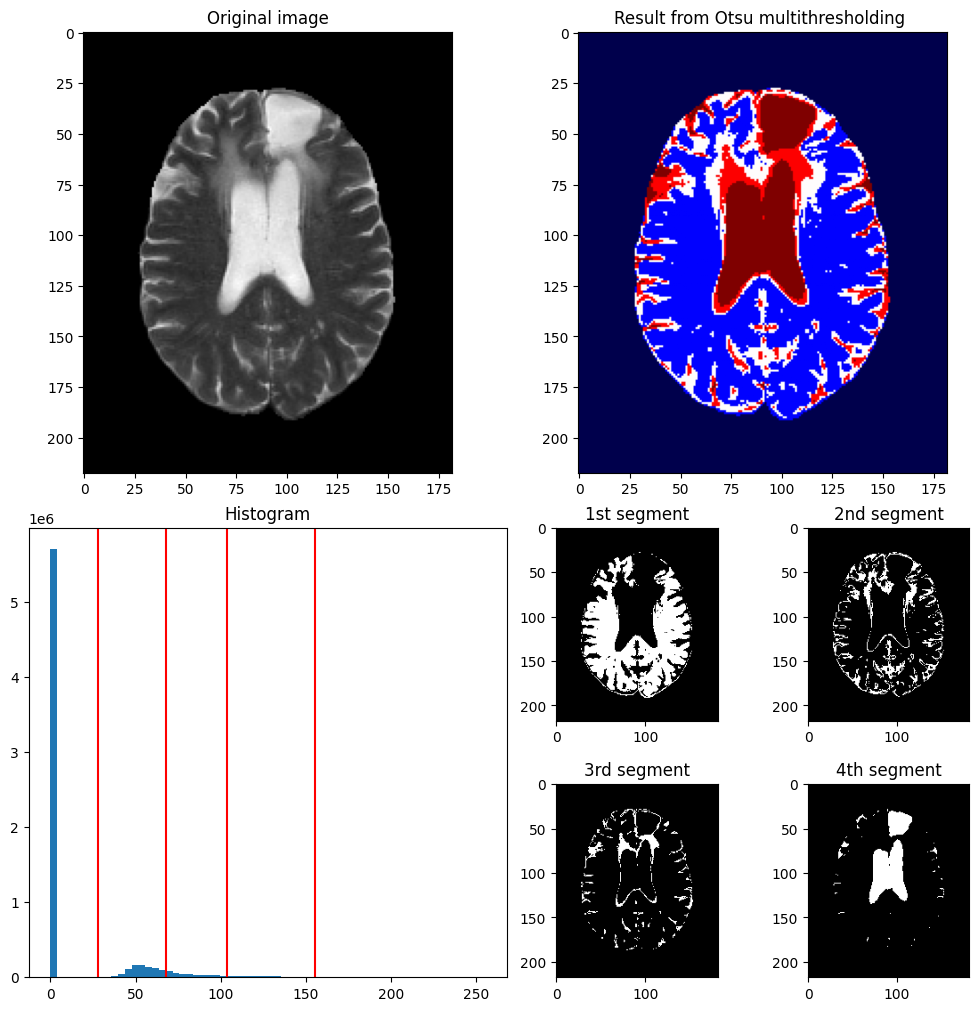

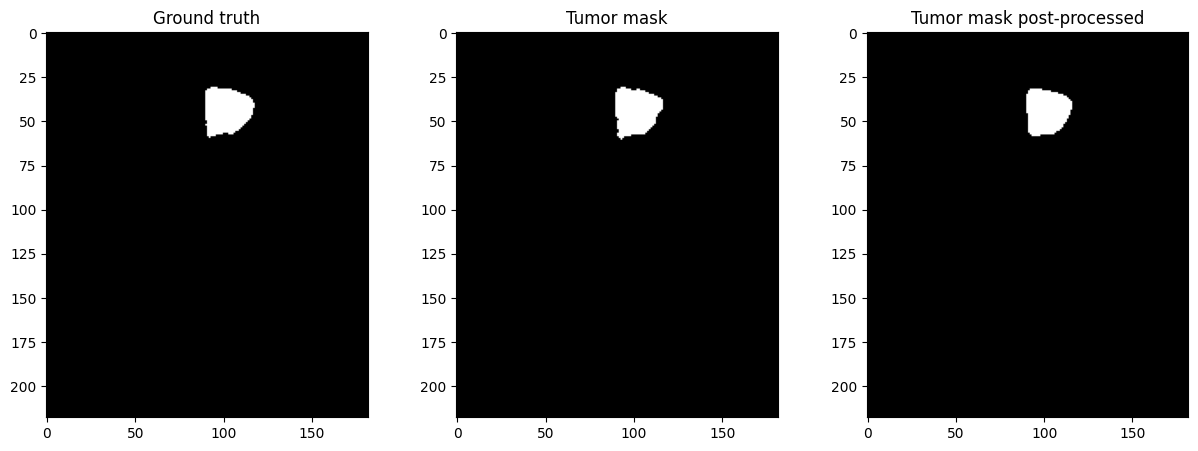

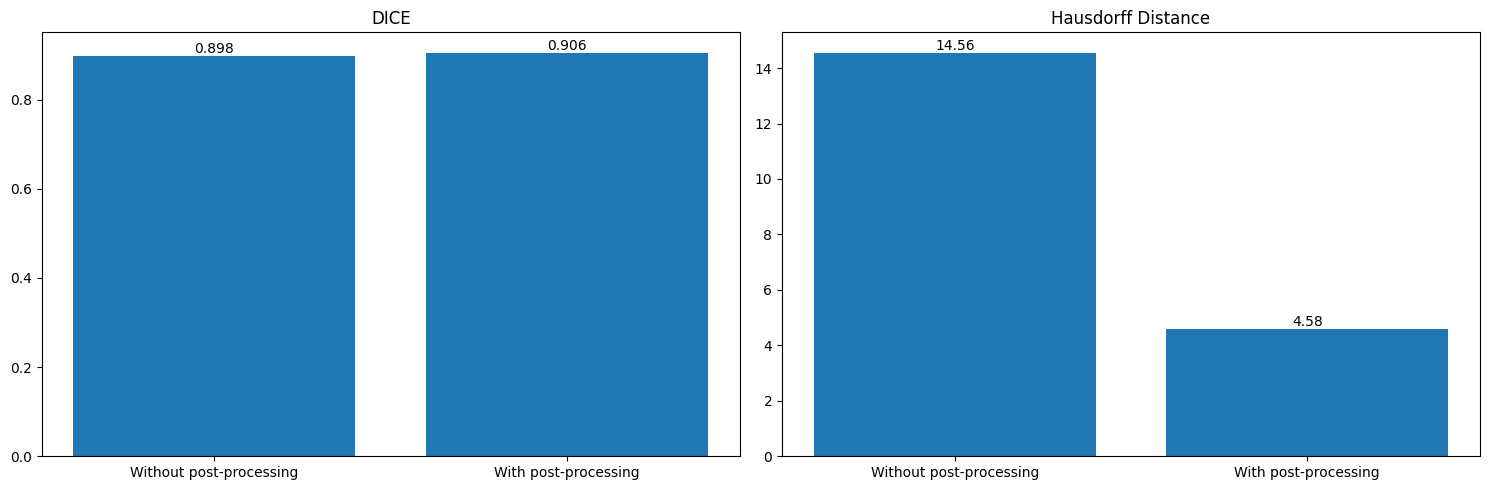

In [2]:
# read in images
image = sitk.ReadImage('Practicum-4/Images/T2.nii.gz')
gt = sitk.ReadImage('Practicum-4/Images/GT.nii.gz', sitk.sitkUInt8)

# set orientation
image = sitk.DICOMOrient(image, 'LPS')
gt = sitk.DICOMOrient(gt, 'LPS')

# rescale intensity
image = sitk.RescaleIntensity(image, 0, 255)

# perform the Otsu multi-thresholding algorithm
otsu_multiple_filter = sitk.OtsuMultipleThresholdsImageFilter()
otsu_multiple_filter.SetNumberOfThresholds(4)
otsu_multiple_filter.SetNumberOfHistogramBins(64)

# show the images and the segments
show_segments(image, otsu_multiple_filter.Execute(image), otsu_multiple_filter.GetThresholds(), 100)  # axial slice 100 gives good visualization
plt.show()
# create function that extracts the tumor
def extract_tumor(image):
    otsu_seg = otsu_multiple_filter.Execute(image)

    # extract only class 4 from the multi-thresholding algorithm
    class4 = otsu_seg == 4
    class4 = sitk.Cast(class4, sitk.sitkUInt8)

    # connected components
    cc = sitk.ConnectedComponentImageFilter()
    cc.FullyConnectedOn()
    labels = cc.Execute(class4)

    # relabel by size
    relabeled = sitk.RelabelComponent(labels, sortByObjectSize=True)

    # choose which label corresponds to tumor
    tumor_label = 2 # done visually

    # create binary tumor mask
    tumor_mask = relabeled == tumor_label
    tumor_mask = sitk.Cast(tumor_mask, sitk.sitkUInt8)

    return tumor_mask

tumor_mask = extract_tumor(image)

median = sitk.BinaryMedianImageFilter()
median.SetRadius((3,3,3))
tumor_clean = median.Execute(tumor_mask)

slice_index = 100 # again slice 100

# plot ground truth vs original vs post-processed mask
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(sitk.GetArrayFromImage(gt)[slice_index], cmap='gray')
ax[0].set_title('Ground truth')
ax[1].imshow(sitk.GetArrayFromImage(tumor_mask)[slice_index], cmap='gray')
ax[1].set_title('Tumor mask')
ax[2].imshow(sitk.GetArrayFromImage(tumor_clean)[slice_index], cmap='gray')
ax[2].set_title('Tumor mask post-processed')
plt.show()

def evaluate(gt, seg):
    # both are binary uint8
    gt = sitk.Cast(gt, sitk.sitkUInt8)
    seg = sitk.Cast(seg, sitk.sitkUInt8)

    # DICE
    dice_filter = sitk.LabelOverlapMeasuresImageFilter()
    dice_filter.Execute(gt, seg)
    dice = dice_filter.GetDiceCoefficient()

    # Hausdorff Distance
    hd_filter = sitk.HausdorffDistanceImageFilter()
    hd_filter.Execute(gt, seg)
    hd = hd_filter.GetHausdorffDistance()

    return dice, hd

dice, hd = evaluate(gt, tumor_mask)
dice_clean, hd_clean = evaluate(gt, tumor_clean)

# plot metrics with barplot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

bars1 = ax[0].bar(['Without post-processing', 'With post-processing'],[dice, dice_clean])
ax[0].set_title('DICE')
for bar in bars1:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2,
               height,
               f"{height:.3f}",
               ha='center',
               va='bottom')
bars2 = ax[1].bar(['Without post-processing', 'With post-processing'],[hd, hd_clean])
ax[1].set_title('Hausdorff Distance')
for bar in bars2:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2,
               height,
               f"{height:.2f}",
               ha='center',
               va='bottom')
plt.tight_layout()
plt.show()



# denk dat we hier nog moeten kijken naar de eenheden van DICE en die distance !!! en zo de interpretatie ook snappen enzo + check ook de segmentatie in Slicer3D !!!


DICE score measures the simularity between two images.
Hausdorff distances gives the maximum distance between two sets. It measures the distance between the boundaries of the mask created and the ground truth and then takes the maximum.

De eenheid zou dus denk ik gewoon afstand zijn of misschien voxels? ben niet helemaal zeker


## 1.2 Region growing

Region-growing algorithms start by defining an initial region, a seed point, usually set by a user inside the object to be segmented. Afterwards, an iterative search is performed. In each iteration, all neighboring pixels of the seed are evaluated, and a criterion is used to determine if they should also be considered part of the object. If so, they are added to the region, and their neighbors will be evaluated in the following iteration.

The criterion to add neighbors varies between applications; these could depend on the brightness, color, texture, gradient, or geometric properties. The most common approach is to consider the intensity of the neighboring pixels. If the intensity values are between specific lower and upper threshold values, they are included within the region. This algorithm has the benefit of considering spatial connectivity, thereby limiting the segmentation to connected regions.

<img src="https://github.com/noco04-ugent/practicum-4/blob/main/Figures/region_growing.png?raw=1" alt="drawing" width="800"/><figcaption><center>**Figure 4:** **(i)** Angio-MRI with seed point at the aortic arch **(ii) - (v)** Region growing from the seed point.</center></figcaption></td>

## Exercise 2

You noticed from the previous exercises that it was impossible to directly separate the tumor from other structures, hence the need to isolate it using sitk.ConnectedComponentImageFilter(). In this exercise, you will attempt to isolate the tumor by implementing a region-growing algorithm in its simplest form.

The algorithm should output a binary image with voxel values equal to 1 for the structure under study and 0 for all other voxels. It should use a seed point and two threshold values (lower and upper) as inputs.

1. Start by reading the image 'T2.nii.gz' and the ground-truth segmentation 'GT.nii.gz' from the folder 'Images'. Read the ground truth as 'sitk.sitkUInt8'.
2. Use ```sitk.DICOMOrient()``` again as in the previous exercise and set the orientation to 'LPS'.
3. Use ```sitk.RescaleIntensity()``` and set ```outputMinimum``` to 0 and ```outputMaximum``` to 255 for the T2 image.
4. Employ as seed point: (100, 50, 100).
5. Build a function that implements a region-growing algorithm. This algorithm has to compare the intensity of the seed point with the neighboring intensities. The voxels are added to the region if they are within the limits. Evaluate the performance of the algorithm using following threshold values:

    - Intensity: $>130$, $>145$, and $>160$.

6. Assess its performance by considering 6 nearest neighbors.

    **To build the algorithm:**
    - List the 6 neighboring voxels.
    - Check if their intensity falls within the threshold boundaries.
    - Grow your region by adding the voxels that meet the condition.
    - List all new neighboring voxels of the obtained new region.
    - Repeat until there are no more voxels to be added.
    
**Hint:** It may be handy to store the indexes (locations) and values of voxels already marked inside and those currently marked as neighbors. For example: 0 - outside, 1 - inside, 2 - neighbor.

6. Since you will be working with an array, convert the result to a SimpleITK image and use ```sitk.CopyInformation()``` to copy the metadata from the original image.
7. Apply a post-processing stage of your choice to the resultant segmentations obtained using the threshold of 160.
8. Calculate the metrics (DICE coefficient and Hausdorff distance) between the ground truth and the obtained segmentations.

## Code
<font color=blue>

- Plot a one-by-five image comparison of the ground truth and the tumor segmentations at each threshold level. Additionally, plot a relation (```plt.plot()```) between the number of thresholds used (x-axis) against the evaluated metric, including the post-processed case. (5 Points)
    
</font>

In [3]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Function to show a new image which is in sitk format
def show_image(image, index):
    '''
    This function conver a sitk image, converts it to array and shows it
    Inputs:
        - image: Image in SimpleITK format that will be plot
        - index: slice index to visualize a slice from the 3D image.
    Outputs:
        - A new plot
    '''
    array = sitk.GetArrayFromImage(image)[index]

    plt.imshow(array, cmap='gray')
    plt.show()

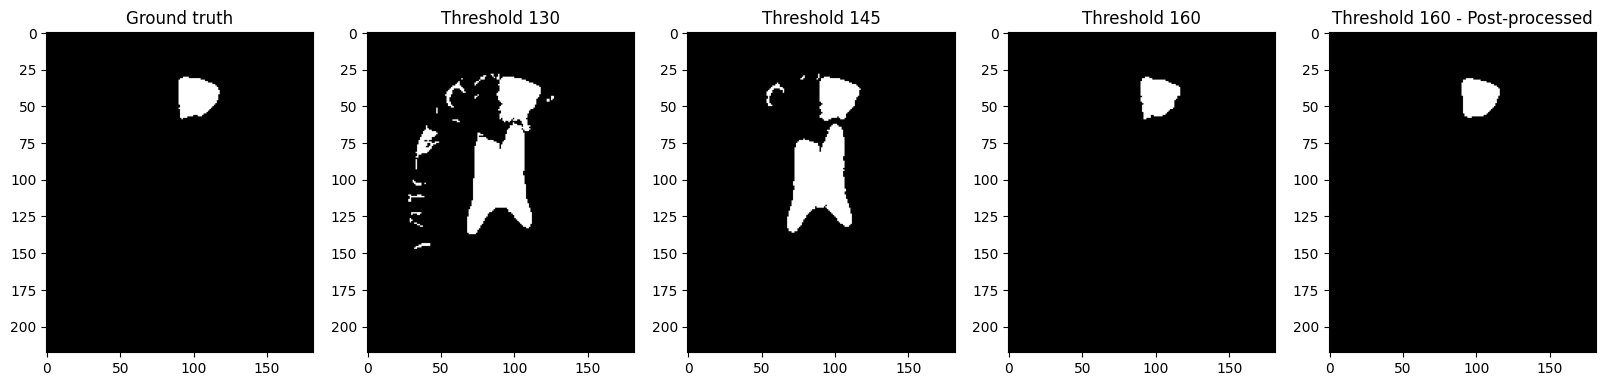

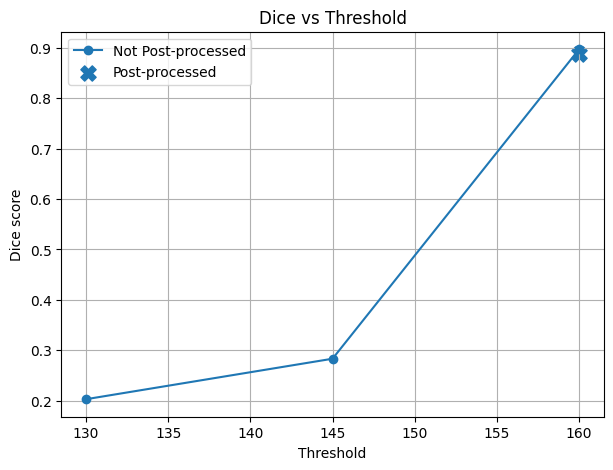

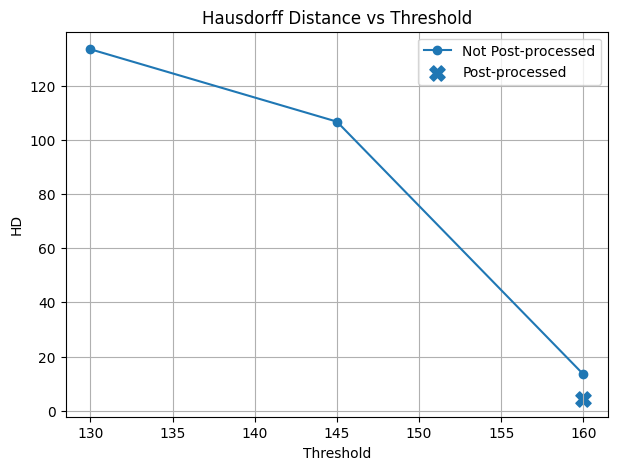

In [4]:
# load images
image = sitk.ReadImage('Practicum-4/Images/T2.nii.gz')
gt = sitk.ReadImage('Practicum-4/Images/GT.nii.gz', sitk.sitkUInt8)

# set orientation
image = sitk.DICOMOrient(image, 'LPS')
gt = sitk.DICOMOrient(gt, 'LPS')

# rescale intensity
image = sitk.RescaleIntensity(image, 0, 255)

# define seed point
seed = (100, 50, 100)

# define threshold values
thresholds = [130, 145, 160]

# build algorithm
def region_growing(image, seed, threshold):
  mask = np.zeros(image.shape, dtype=np.uint8)
  neighbours = [seed]
  region = set()   # voxels in set
  sx, sy, sz = image.shape
  offsets = [(1, 0, 0), (-1, 0, 0),(0, 1, 0), (0,-1, 0),(0, 0, 1), (0, 0,-1)] # neighbour coordinates offset


  while len(neighbours) > 0:
    new_neighbours = []

    for voxel in neighbours:
      x, y, z = voxel
      if not (0 <= x < sx and 0 <= y < sy and 0 <= z < sz):  # check if voxel is not outside the image
        continue
      if voxel in region: # if voxel is already examined, skip it
        continue

      region.add(voxel)

      if image[x, y, z] > threshold:
        mask[x, y, z] = 1 # add to mask
        for dx, dy, dz in offsets: # look at the new pixel its neighbours
          nx, ny, nz = x+dx, y+dy, z+dz
          if (nx, ny, nz) not in region:
            new_neighbours.append((nx, ny, nz)) # add to the next neighbours list

    neighbours = new_neighbours
  return mask

image_np = sitk.GetArrayFromImage(image)
masks = []

for threshold in thresholds:
    mask_np = region_growing(image_np, seed, threshold)
    mask_itk = sitk.GetImageFromArray(mask_np)
    mask_itk.CopyInformation(image)
    masks.append(mask_itk)

# preprocess
median = sitk.BinaryMedianImageFilter()
median.SetRadius((3,3,3))
masks_post_160 = median.Execute(masks[2])

ig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].imshow(sitk.GetArrayFromImage(gt)[100], cmap='gray')
ax[0].set_title('Ground truth')

for i in range(3):
    ax[i+1].imshow(sitk.GetArrayFromImage(masks[i])[100], cmap='gray')
    ax[i+1].set_title(f'Threshold {thresholds[i]}')

ax[4].imshow(sitk.GetArrayFromImage(masks_post_160)[100], cmap='gray')
ax[4].set_title('Threshold 160 - Post-processed')

plt.show()

# metrics
dice_130, hd_130 = evaluate(gt, masks[0])
dice_145, hd_145 = evaluate(gt, masks[1])
dice_160, hd_160 = evaluate(gt, masks[2])
dice_post = evaluate(gt, masks_post_160)[0]
hd_post   = evaluate(gt, masks_post_160)[1]
# metric values (no post-processing)
dice_vals = [dice_130, dice_145, dice_160]
hd_vals   = [hd_130,   hd_145,   hd_160]

plt.figure(figsize=(7,5))
plt.plot(thresholds, dice_vals, marker='o', label="Not Post-processed")
plt.scatter([160], [dice_post], s=120, marker='X', label="Post-processed")
plt.title("Dice vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Dice score")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7,5))
plt.plot(thresholds, hd_vals, marker='o', label="Not Post-processed")
plt.scatter([160], [hd_post], s=120, marker='X', label="Post-processed")
plt.title("Hausdorff Distance vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("HD")
plt.legend()
plt.grid(True)
plt.show()



# Ik weet nog niet of deze plots enzo goed genoeg zijn en of het volledig is wat ze bedoelen ??  hier ook zelfde voor interpretatie van die metrics